In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Read the dataset from the txt file
sunshine_data = pd.read_csv("./datasets/UK Met Office Public Data - Hours of Strong Sunshine Series.txt", delim_whitespace=True, skiprows=5)
# Set the 'Year' column as the index
sunshine_data.set_index('year', inplace=True)
print(sunshine_data.head)

<bound method NDFrame.head of        jan   feb    mar    apr    may    jun    jul    aug    sep    oct  \
year                                                                       
1910  50.9  72.2  130.3  122.8  190.5  177.5  148.6  128.8  120.5   74.5   
1911  46.1  60.4  102.0  126.2  208.1  205.1  250.4  201.1  163.2   86.2   
1912  33.5  53.5   89.7  195.6  153.8  129.7  133.3   80.5  110.8   91.6   
1913  29.3  52.0  100.9  115.5  161.2  170.9  133.0  144.1  105.2   88.1   
1914  28.6  59.1   93.7  202.3  157.4  207.3  145.5  172.8  158.7   73.0   
...    ...   ...    ...    ...    ...    ...    ...    ...    ...    ...   
2019  50.8  99.1  115.2  168.7  186.9  159.7  173.3  175.1  142.9   88.4   
2020  45.1  73.4  136.1  223.0  266.9  161.2  144.5  145.4  144.9   66.9   
2021  44.2  71.4  102.2  223.8  161.4  181.0  190.4  127.1  118.8   80.2   
2022  63.6  74.1  165.7  168.0  154.0  196.8  179.5  208.4  118.6  104.7   
2023  63.1  70.2   81.1  158.2  207.2  182.7  446.5    NaN

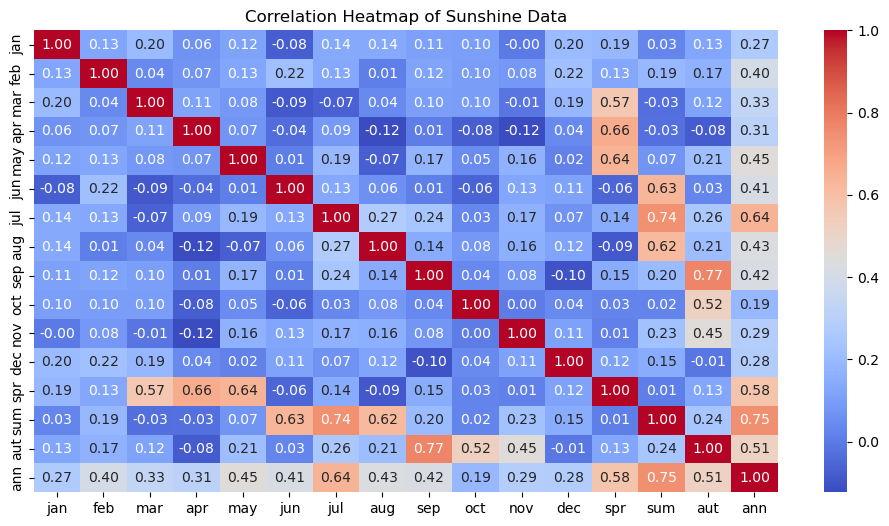

In [23]:
# Visualize the data using Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(sunshine_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Sunshine Data")
plt.show()

In [28]:
# Read the dataset from the txt file
max_temp_data = pd.read_csv("./datasets/UK Met Office Public Data - Maximum Temperature Series.txt", delim_whitespace=True, skiprows=5)
# Set the 'Year' column as the index
max_temp_data.set_index('year', inplace=True)
print(max_temp_data.head)

<bound method NDFrame.head of       jan   feb   mar   apr   may    jun    jul   aug   sep   oct   nov  dec  \
year                                                                           
1884  7.3   6.8   8.5  10.1  14.5  17.10  18.80  20.2  17.0  11.8   7.5  5.8   
1885  4.3   7.3   7.2  10.8  11.8  17.00  19.40  16.8  15.0   9.3   7.5  5.9   
1886  3.7   3.4   6.1  10.5  13.1  16.40  18.70  18.5  16.0  12.9   8.6  4.1   
1887  4.8   6.9   6.7   9.9  13.0  19.80  20.70  19.1  14.5  10.0   6.6  4.9   
1888  5.5   3.7   5.2   9.0  14.1  16.30  16.00  16.9  15.4  11.4   8.9  7.1   
...   ...   ...   ...   ...   ...    ...    ...   ...   ...   ...   ...  ...   
2019  6.2  10.0  10.1  12.9  14.6  17.30  20.70  19.9  17.1  12.2   7.9  7.9   
2020  8.3   8.0   9.3  14.2  16.7  18.30  18.30  19.9  17.1  12.4  10.7  6.8   
2021  4.9   7.0   9.8  10.9  13.4  18.70  21.10  18.9  18.6  14.0   9.9  7.8   
2022  7.7   8.7  11.1  12.6  15.9  18.60  21.30  21.7  17.4  14.9  10.9  5.9   
2023  7.3 

In [26]:
# Read the dataset from the txt file
mean_days_w_rainfall_data = pd.read_csv("./datasets/UK Met Office Public Data - Mean Days 1mm or Above Rainfall Series.txt", delim_whitespace=True, skiprows=5)
# Set the 'Year' column as the index
mean_days_w_rainfall_data.set_index('year', inplace=True)
print(mean_days_w_rainfall_data.head)

<bound method NDFrame.head of        jan   feb   mar   apr   may   jun   jul   aug   sep   oct   nov   dec  \
year                                                                           
1891  13.6   3.5  13.2   8.8  15.3   8.9  15.3  21.5  15.5  18.7  15.3  18.7   
1892  15.3  13.7   7.4   8.8  13.7  13.7   9.9  15.8  15.0  19.2  13.9  12.0   
1893  14.5  18.2   7.1   5.0   9.7   8.4  15.3  14.3  14.1  16.9  13.7  17.3   
1894  19.7  16.7  10.4  12.6  15.9  12.9  16.4  16.8   6.6  15.2  14.9  15.7   
1895  17.4   4.3  16.5  11.5   5.5   9.1  16.2  18.0   7.0  16.8  17.5  16.4   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2019  11.0  10.3  16.1   7.8  10.8  14.5  10.9  15.6  15.4  17.3  17.3  17.6   
2020  15.0  21.4  11.9   5.8   5.4  15.4  14.5  13.7  10.1  21.1  14.9  20.7   
2021  17.4  13.7  11.2   5.1  16.9   6.9  10.7  10.0  10.8  17.1  11.8  17.1   
2022  10.8  18.1   8.5   7.8  14.4  10.4   7.5   8.0  13.2  19.2  18.6  15.2   
2023  16.1

In [25]:
# Read the dataset from the txt file
mean_temp_data = pd.read_csv("./datasets/UK Met Office Public Data - Mean Temperature Series.txt", delim_whitespace=True, skiprows=5)
# Set the 'Year' column as the index
mean_temp_data.set_index('year', inplace=True)
print(mean_temp_data.head)

<bound method NDFrame.head of       jan  feb  mar  apr   may    jun    jul   aug   sep   oct  nov  dec  \
year                                                                       
1884  5.0  4.2  5.1  6.2   9.7  12.50  14.50  15.3  13.0   8.3  4.6  3.3   
1885  2.0  4.2  3.5  6.6   7.6  12.30  14.50  12.4  10.9   6.2  4.8  3.0   
1886  1.1  0.8  2.9  6.3   8.8  11.90  14.20  14.1  12.0   9.9  5.7  1.2   
1887  2.1  3.5  3.3  5.4   8.7  14.30  15.60  14.0  10.6   6.4  3.9  2.1   
1888  2.8  1.1  2.1  5.3   9.2  11.80  12.30  12.8  11.2   7.6  6.5  4.3   
...   ...  ...  ...  ...   ...    ...    ...   ...   ...   ...  ...  ...   
2019  3.4  6.0  6.8  8.4  10.0  13.20  16.40  15.8  13.1   8.9  5.3  5.1   
2020  5.6  5.1  5.6  9.1  11.3  14.00  14.30  15.9  12.8   9.4  7.7  4.3   
2021  2.2  4.1  6.4  5.7   9.1  14.20  16.60  15.0  14.7  10.9  7.0  5.3   
2022  4.7  5.6  6.7  8.1  11.8  13.90  16.50  16.6  13.4  11.6  8.2  2.9   
2023  4.4  5.8  5.7  7.8  11.6   4.31   8.36   NaN   NaN  

In [29]:
# Read the dataset from the txt file
min_temp_data = pd.read_csv("./datasets/UK Met Office Public Data - Minimum Temparature Series.txt", delim_whitespace=True, skiprows=5)
# Set the 'Year' column as the index
min_temp_data.set_index('year', inplace=True)
print(min_temp_data.head)

<bound method NDFrame.head of       jan  feb  mar  apr  may  jun    jul   aug   sep  oct  nov  dec    win  \
year                                                                          
1884  2.7  1.4  1.8  2.2  5.0  7.9  10.30  10.5   9.0  4.9  1.8  0.9    ---   
1885 -0.3  1.3 -0.1  2.5  3.5  7.8   9.50   8.1   6.8  3.1  2.3  0.3   0.61   
1886 -1.5 -1.8 -0.1  2.2  4.7  7.5   9.80  10.0   8.1  6.9  3.0 -1.7  -0.96   
1887 -0.7  0.2 -0.1  0.9  4.6  8.8  10.60   9.0   6.8  2.9  1.2 -0.7  -0.75   
1888  0.2 -1.4 -0.9  1.7  4.6  7.3   8.70   8.8   7.0  3.8  4.2  1.6  -0.64   
...   ...  ...  ...  ...  ...  ...    ...   ...   ...  ...  ...  ...    ...   
2019  0.8  2.0  3.5  3.8  5.5  9.2  12.10  11.7   9.1  5.7  2.7  2.4   2.00   
2020  3.0  2.1  1.9  4.0  6.1  9.8  10.40  11.9   8.6  6.4  4.8  1.9   2.51   
2021 -0.5  1.1  3.0  0.5  4.9  9.8  12.10  11.1  10.7  7.8  4.0  2.8   0.84   
2022  1.7  2.5  2.3  3.5  7.8  9.2  11.80  11.6   9.4  8.3  5.5 -0.1   2.31   
2023  1.5  2.6  2.4  3

In [30]:
# Read the dataset from the txt file
mm_rainfall_data = pd.read_csv("./datasets/UK Met Office Public Data - mm Rainfall Series.txt", delim_whitespace=True, skiprows=5)
# Set the 'Year' column as the index
mm_rainfall_data.set_index('year', inplace=True)

print(mm_rainfall_data.head)

<bound method NDFrame.head of         jan    feb    mar   apr    may    jun    jul    aug    sep    oct  \
year                                                                        
1836  101.5   69.8  122.2  75.1   13.8   76.5  109.2   63.1  113.2  120.8   
1837   79.5  104.7   36.2  54.1   39.9   57.9   87.5   90.7   67.5   97.0   
1838   35.4   55.5   69.4  57.1   61.8  117.8   84.2   92.8   74.9   93.7   
1839   75.7   67.2   83.1  38.4   35.5   93.7  118.5   84.3  145.1  102.1   
1840  124.6   67.9   14.2  23.2   83.6   68.6   90.3   78.0  106.1   65.9   
...     ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
2019   64.6   71.1  128.9  48.6   63.6  109.0   89.1  132.6  126.1  139.8   
2020  121.3  213.7   78.5  30.0   32.8  107.6   96.0  122.2   77.4  182.7   
2021  139.6  105.4   87.0  20.5  121.0   44.7   74.5   66.6   82.3  167.8   
2022   62.9  151.3   50.7  49.8   77.5   61.8   48.4   51.9  105.2  147.5   
2023  125.7   43.4  132.0  69.8   39.0  285.2 